In [ ]:
class Instrument:
    def __init__(self, name, initial_price):
        self.name = name
        self.initial_price = initial_price

    def get_price(self):
        raise NotImplementedError("Subclass must implement abstract method")

In [ ]:
import numpy as np

class BrownianStock(Instrument):
    def __init__(self, name, initial_price, mu, sigma):
        super().__init__(name, initial_price)
        self.mu = mu  # 평균 수익률
        self.sigma = sigma  # 변동성

    def simulate_price(self, time_horizon, steps):
        dt = time_horizon / steps
        prices = [self.initial_price]
        for _ in range(steps):
            dt_price_change = self.mu * prices[-1] * dt + self.sigma * prices[-1] * np.random.normal() * np.sqrt(dt)
            prices.append(prices[-1] + dt_price_change)
        return prices


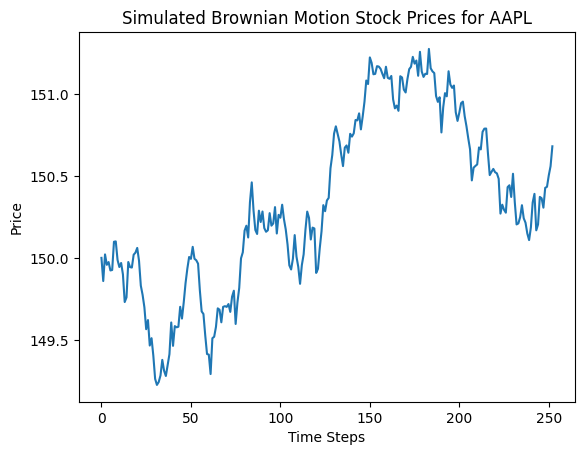

In [ ]:
stock = BrownianStock("AAPL", 150, 0.0002, 0.01)
simulated_prices = stock.simulate_price(time_horizon=1, steps=252)

import matplotlib.pyplot as plt

plt.plot(simulated_prices)
plt.title('Simulated Brownian Motion Stock Prices for AAPL')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()


In [ ]:
stock.get_price()

NotImplementedError: Subclass must implement abstract method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch

# MNIST dataset

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = torch.tensor(x_train.reshape(60000, 784)/255, dtype=torch.float32)
x_test = torch.tensor(x_test.reshape(10000, 784)/255, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.int64)

### Model, Parameters, Loss Function

In [ ]:
import torch.nn.functional as F

w = torch.randn(784, 10, requires_grad=True)
b = torch.randn(10, requires_grad=True)

loss_fn = F.cross_entropy

def model(xb):
    return xb @ w + b

### Hyperparameters

In [ ]:
bs = 64  # batch size
lr = 0.1  # learning rate
epochs = 10 # number of training

n, c = x_train.shape

In [ ]:
n

60000

In [ ]:
n / bs

937.5

In [ ]:
(n-1) // bs

937

In [ ]:
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_fn(pred, yb)

        loss.backward()
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr
            w.grad.zero_()
            b.grad.zero_()

print(loss)

tensor(0.1061, grad_fn=<NllLossBackward0>)


In [ ]:
np.exp(-0.1061)

0.8993347101080899

In [ ]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [ ]:
accuracy(model(x_train), y_train)

tensor(0.8909)

In [ ]:
torch.argmax(model(x_train), dim=1)

tensor([5, 0, 4,  ..., 5, 6, 8])

# Refactor using `nn.Module`

In [ ]:
from torch.nn import Module, Parameter

class MyModel(Module):

    def __init__(self):
        super().__init__()
        self.w = Parameter(torch.randn(784,10))
        self.b = Parameter(torch.randn(10))

    def forward(self, x):
        return x @ self.w + self.b

In [ ]:
model = MyModel()

In [ ]:
loss = loss_fn(model(x_train), y_train)
loss

tensor(18.4475, grad_fn=<NllLossBackward0>)

In [ ]:
loss.backward()

In [ ]:
with torch.no_grad():
    for p in model.parameters():
        p -= p.grad * lr
    model.zero_grad()

In [ ]:
def fit():

    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_fn(pred, yb)

            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

        if epoch % 10 == 0:
            print(loss)


In [ ]:
fit()

tensor(0.0413, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.0416, grad_fn=<NllLossBackward0>)
tensor(0.0419, grad_fn=<NllLossBackward0>)
tensor(0.0422, grad_fn=<NllLossBackward0>)
tensor(0.0425, grad_fn=<NllLossBackward0>)
tensor(0.0428, grad_fn=<NllLossBackward0>)
tensor(0.0431, grad_fn=<NllLossBackward0>)
tensor(0.0434, grad_fn=<NllLossBackward0>)
tensor(0.0437, grad_fn=<NllLossBackward0>)


In [ ]:
np.exp(-0.0437)

0.9572410867275233

In [ ]:
accuracy(model(x_test), y_test)

tensor(0.9227)

# Refactoring using `nn.Linear`

In [ ]:
class MyModel(Module):

    def __init__(self):
        super().__init__()
        self.linear = Linear(784, 10)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = MyModel()
loss_fn(model(x_train), y_train)

tensor(2.3255, grad_fn=<NllLossBackward0>)

In [ ]:
np.exp(-2.3165)

0.09861814578255018

In [ ]:
fit()

tensor(0.1735, grad_fn=<NllLossBackward0>)
tensor(0.0918, grad_fn=<NllLossBackward0>)
tensor(0.0820, grad_fn=<NllLossBackward0>)
tensor(0.0780, grad_fn=<NllLossBackward0>)
tensor(0.0758, grad_fn=<NllLossBackward0>)
tensor(0.0742, grad_fn=<NllLossBackward0>)
tensor(0.0729, grad_fn=<NllLossBackward0>)
tensor(0.0718, grad_fn=<NllLossBackward0>)
tensor(0.0708, grad_fn=<NllLossBackward0>)
tensor(0.0698, grad_fn=<NllLossBackward0>)


In [ ]:
loss_fn(model(x_test), y_test)

tensor(0.2704, grad_fn=<NllLossBackward0>)

In [ ]:
loss_fn(model(x_train), y_train)

tensor(0.2388, grad_fn=<NllLossBackward0>)

In [ ]:
np.exp(-0.2704)

0.7630742036013362

In [ ]:
accuracy(model(x_test), y_test)

tensor(0.9235)

# Refactoring using `torch.optim`

In [ ]:
from torch import optim

In [ ]:
opt = optim.Adam(model.parameters())

def fit():

    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_fn(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        if epoch % 10 == 0:
            print(loss)

In [ ]:
fit()

tensor(0.0657, grad_fn=<NllLossBackward0>)
tensor(0.0648, grad_fn=<NllLossBackward0>)
tensor(0.0629, grad_fn=<NllLossBackward0>)
tensor(0.0611, grad_fn=<NllLossBackward0>)
tensor(0.0596, grad_fn=<NllLossBackward0>)
tensor(0.0584, grad_fn=<NllLossBackward0>)
tensor(0.0573, grad_fn=<NllLossBackward0>)
tensor(0.0564, grad_fn=<NllLossBackward0>)
tensor(0.0555, grad_fn=<NllLossBackward0>)
tensor(0.0547, grad_fn=<NllLossBackward0>)


# Refactor using `Dataset` and `DataLoader`

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
x_train.to(dev)

NameError: name 'dev' is not defined

In [ ]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=64)

In [ ]:
for i in train_dl:
    print(len(i[0][0]))

In [ ]:
model = MyModel()
opt = optim.Adam(model.parameters())
epochs=100

def fit():

    for epoch in range(epochs):
        for xb, yb in train_dl:
            xb.to(dev)
            yb.to(dev)
            pred = model(xb)
            loss = loss_fn(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        if epoch % 10 == 0:
            print(loss)

In [ ]:
fit()

tensor(0.1604, grad_fn=<NllLossBackward0>)
tensor(0.0814, grad_fn=<NllLossBackward0>)
tensor(0.0755, grad_fn=<NllLossBackward0>)
tensor(0.0713, grad_fn=<NllLossBackward0>)
tensor(0.0681, grad_fn=<NllLossBackward0>)
tensor(0.0655, grad_fn=<NllLossBackward0>)
tensor(0.0634, grad_fn=<NllLossBackward0>)
tensor(0.0616, grad_fn=<NllLossBackward0>)
tensor(0.0600, grad_fn=<NllLossBackward0>)
tensor(0.0586, grad_fn=<NllLossBackward0>)


# Using GPU

In [ ]:
import torch


In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(dev)


cuda


In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = torch.tensor(x_train.reshape(60000, 784)/255, dtype=torch.float32).to(dev)
x_test = torch.tensor(x_test.reshape(10000, 784)/255, dtype=torch.float32).to(dev)

y_train = torch.tensor(y_train, dtype=torch.long).to(dev)
y_test = torch.tensor(y_test, dtype=torch.int64).to(dev)

In [ ]:
import torch.nn.functional as F

loss_fn = F.cross_entropy

In [ ]:
from torch.nn import *
from torch import optim

In [ ]:
class MyModel(Module):

    def __init__(self):
        super().__init__()
        self.linear = Linear(784, 10)

    def forward(self, x):
        return self.linear(x)

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=64)

In [ ]:
model = MyModel().to(dev)
opt = optim.Adam(model.parameters())
epochs=100

def fit():

    for epoch in range(epochs):
        for xb, yb in train_dl:
            #xb.to(dev)
            #yb.to(dev)
            pred = model(xb)
            loss = loss_fn(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

        if epoch % 10 == 0:
            print(loss)

In [ ]:
fit()

tensor(0.1587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0748, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0676, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0651, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0598, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0584, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
def preprocess(x, y):
    return x.view(-1, 784).to(dev), y.to(dev)


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))


train_dl = WrappedDataLoader(train_dl, preprocess)
